 <h1><center><strong> Bank Marketing Preduction model (MVP)</strong></center></h1>
 <hr style="color:#E1CF01">

## Step1: Importing Libraries & Reading Data
<hr style="color:#E1CF01">

In [238]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [239]:
# Read dataset 
df = pd.read_csv('bankdata.csv', delimiter=';')

In [240]:
# Show first five rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [241]:
# Show last five rows
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [242]:
# Show how many rows and columns
df.shape

(41188, 21)

## Step2: Data Wrangling.
<hr style="color:#E1CF01">

### 1. Data Cleaning

In [243]:
# Assess summary of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [244]:
# Assess statistics for each column
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


the "duration" variable is not a good predictor of a potential "yes" because a 0 is an automatic "no" and time spent before a call cannot be known. We will therefore first drop this from our data set

The '999' has significant influence over 'pdays'


In [245]:
# Show null value from all datafream 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [246]:
# Assess if there are any duplicates.
sum(df.duplicated())

12

In [247]:
# Drop duplicates.
df.drop_duplicates(inplace=True)

In [248]:
# Create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat_vars.append(col)
    else: 
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 11 categorical variables: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
There are 10 continuous variables: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [249]:
# Check the number of unique values and the percent each value represents
# For each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {df[v].nunique()}\n', 
          round(df[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 12
 admin.           25.30
blue-collar      22.47
technician       16.37
services          9.63
management        7.10
retired           4.17
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.13
unknown           0.80
Name: job, dtype: float64 

Unique values for marital: 4
 married     60.52
single      28.08
divorced    11.20
unknown      0.19
Name: marital, dtype: float64 

Unique values for education: 8
 university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64 

Unique values for default: 3
 no         79.12
unknown    20.88
yes         0.01
Name: default, dtype: float64 

Unique values for housing: 3
 yes        52.39
no         45.21
unknown     2.40
Name: housing, dtype: float64 

Unique valu

default: includes over 20% "unknown"
This would be a large value to impute or drop.
With a very small value for "yes" we could likely safely code all "unknowns" as "no"
But, this is also interesting considering the business problem - it would be interesting to know if lack of knowledge of a default actually positively or negatively contributes to a successful marketing call
We will leave "unknown" in place for now

We will drop 'unknown' from 
- marital
- education
- housing
- loan

In [250]:
#Delete 'unknown' value from columns
df.drop(df.index[df['job']=='unknown'], inplace=True)
df.drop(df.index[df['marital']=='unknown'], inplace=True)
df.drop(df.index[df['education']=='unknown'], inplace=True)
df.drop(df.index[df['housing']=='unknown'], inplace=True)
df.drop(df.index[df['loan']=='unknown'], inplace=True)

In [251]:
df.shape

(38234, 21)

The "999" value for 'pdays', which is the number of days since the customer was previously contacted is very prevalent.

In [252]:
# Check the the number of time '999' occurs relative to other values
df.pdays.value_counts(normalize=True)

999    0.964273
3      0.010279
6      0.009913
4      0.002772
2      0.001491
9      0.001439
12     0.001386
7      0.001360
5      0.001177
10     0.001151
13     0.000863
11     0.000680
1      0.000628
15     0.000575
14     0.000471
0      0.000392
8      0.000366
16     0.000209
17     0.000157
18     0.000131
19     0.000078
22     0.000078
21     0.000052
25     0.000026
26     0.000026
27     0.000026
Name: pdays, dtype: float64

- The placeholder represents over 96% of values
- 0 is also a value, which may mean that a customer had previously been called on the same day

We will create a new binary variable that indicates whether or not a customer had been previously contacted. With only 4% of customers having been previously contacted.

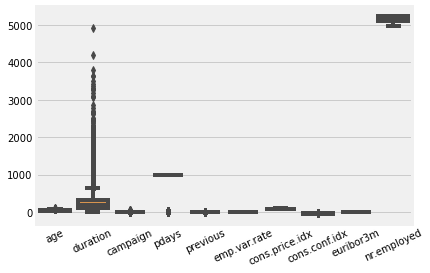

In [253]:
#Check Outlier
sns.boxplot(data=df)
plt.xticks(rotation=25);

In [254]:
#Check Outlier
fig =px.box(df, y="age")
fig.show()

### 1. Feature Engineering

In [255]:
# Drop columns they we don't want it
# df.drop(['pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis=1,inplace=True)
# df.head()

In [256]:
df = df.drop(columns=['duration'], axis=1)

In [257]:
# Rename the column y to subscribed to a deposit.
# df = df.rename(columns = {'y': 'subscribed to a deposit'}, inplace = False)

In [258]:
# Create new column that indidates where or not a customer has been contacted
# Since 999 means "not contacted" we can use that as an identifier

df['p_contacted'] = [0 if x == 999 else 1 for x in df.pdays] 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [259]:
# Check value counts for p_contacted
df.p_contacted.value_counts(normalize=True)

0    0.964273
1    0.035727
Name: p_contacted, dtype: float64

In [260]:
# Drop the 'pdays' column
df.drop(columns=['pdays'], inplace=True)
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Step3: Exploratory Data Analysis
<hr style="color:#00873e">

### Counts of categorical variables

In [261]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = df[cat_vars]
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [262]:
# add the 'p_contacted' variable to cat_data
cat_data = cat_data.join(data.p_contacted)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,p_contacted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,0


Plot category counts and relationship with 'y'

We'll plot the overall counts of each categorical variable value and look at the rate of "yeses" we got for each to start looking for possible relationships for a successful marketing campaign.

It will help to first turn our target variable 'y' into a binary dummy so that we can get averages

In [263]:
# one-hot encode the target variable 'y'
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,p_contacted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,0


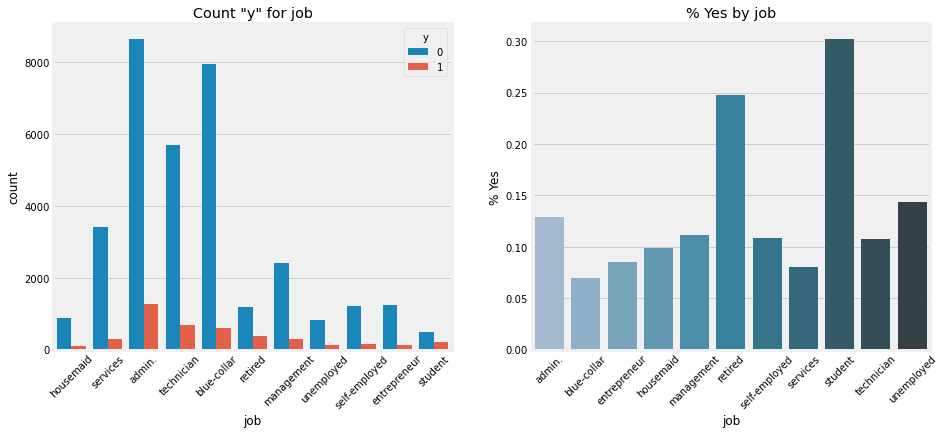

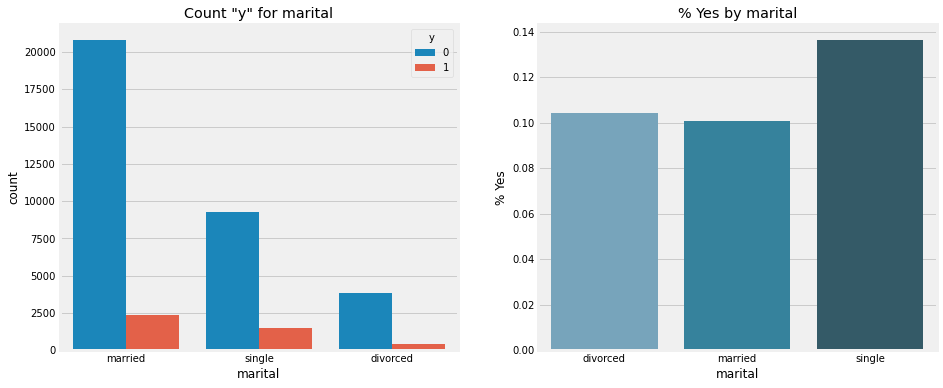

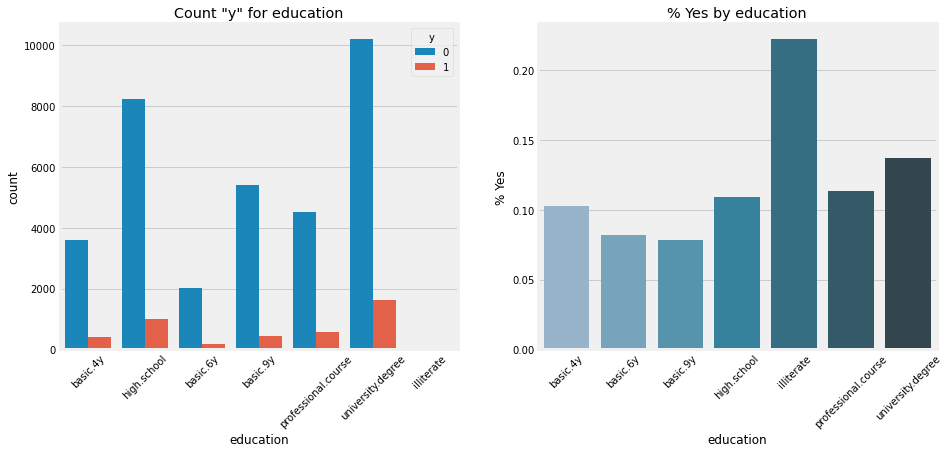

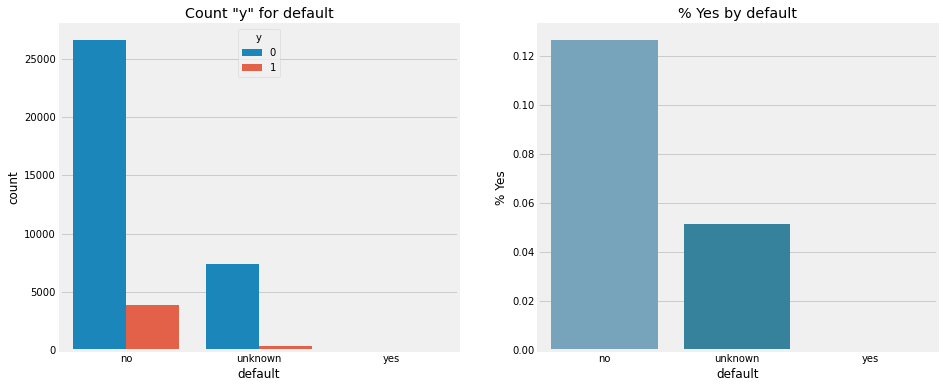

In [264]:
for col in cat_data.columns.values:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title(f'Count "y" for {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

### Distributions of continuous variables

In [ ]:
# check the values we have for continuous variables
cont_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
#drop 'duration' and 'pdays' from the list 
cont_vars.remove('duration')
cont_vars.remove('pdays')
cont_vars

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
# create a dataframe of continuous variables using our list
cont_data = data[cont_vars]
cont_data.head(2)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0


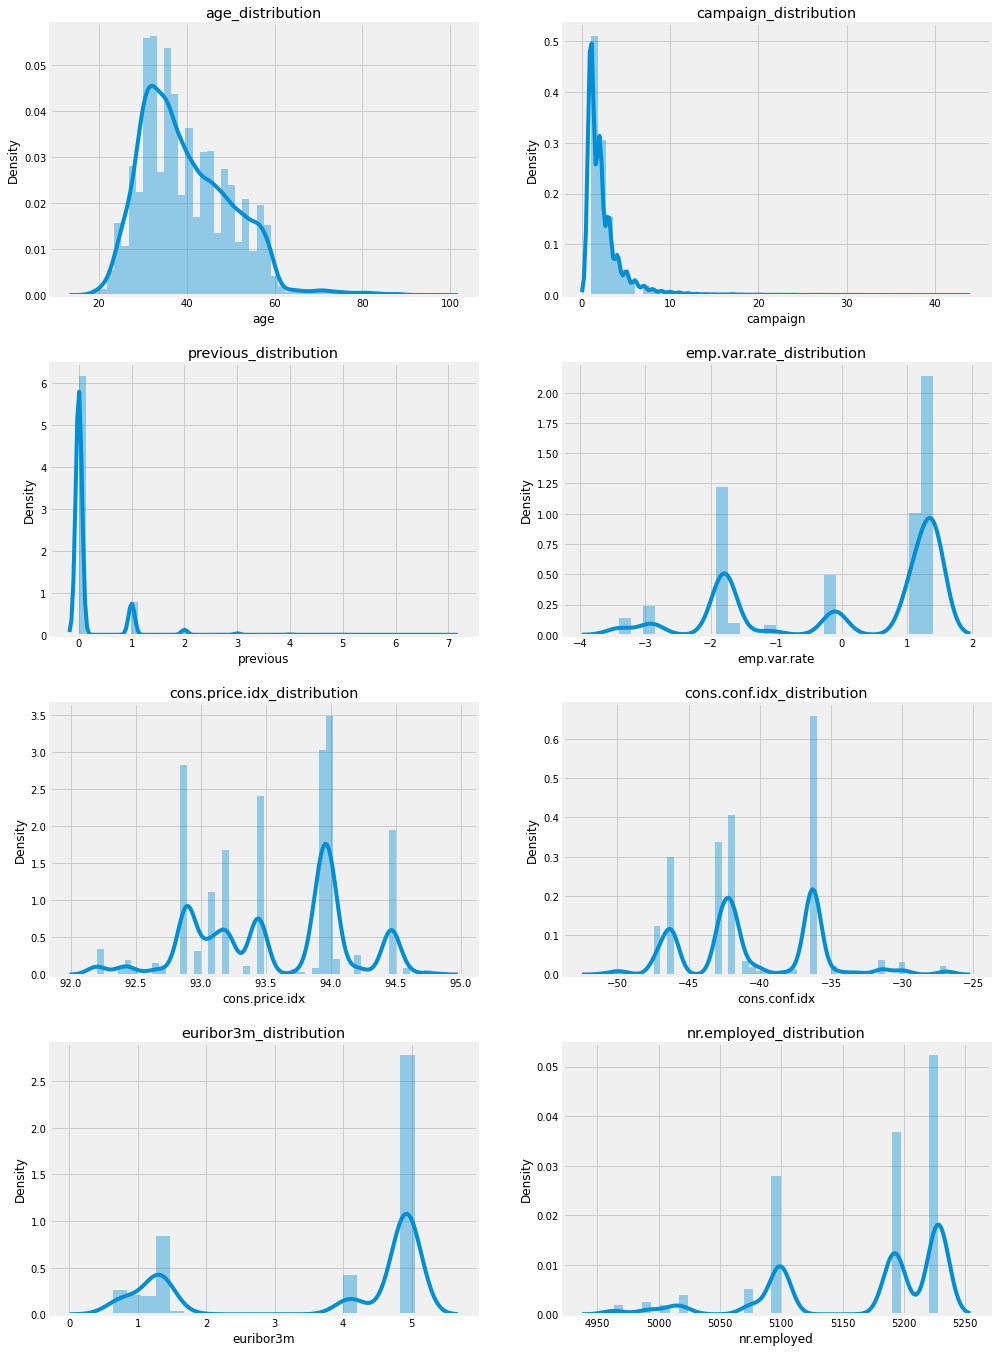

In [ ]:
def plot_cont(df):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                     ax=ax)
        plt.title(t + '_distribution')

# plot histograms for the continuus variables
plot_cont(cont_data)

## Step4: Modeling